### problem statement 

xyz co's 2014-2018 sales data to identify the key revenue and profit drivers across products, channel, regions, uncover seasonal trends and outliers.and align performance against budget. use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

#### Objectives

-identiify the top performing products channel and regions driving revenue and profit.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sheets = pd.read_excel("Regional Sales Dataset.xlsx", sheet_name=None)

In [34]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [35]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [36]:
df_sales.shape

(64104, 12)

In [37]:
print(f"df_sales shape {df_sales.shape}")
print(f"df_customers shape {df_customers.shape}")
print(f"df_regions shape {df_regions.shape}")
print(f"df_state_reg shape {df_state_reg.shape}")
print(f"df_products shape {df_products.shape}")
print(f"df_2017 budget shape {df_budgets.shape}")

df_sales shape (64104, 12)
df_customers shape (175, 2)
df_regions shape (994, 15)
df_state_reg shape (49, 3)
df_products shape (30, 2)
df_2017 budget shape (30, 2)


In [38]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [39]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [40]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [41]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [15]:
df_state_reg.head()

,DE,Delaware,South
0,FL,Florida,South
1,GA,Georgia,South
2,HI,Hawaii,West
3,IA,Iowa,Midwest
4,ID,Idaho,West


In [42]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [43]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [45]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [46]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [47]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [48]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [49]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [52]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

Data Cleaning and wrangling

In [137]:
#merge with Customers

df = df_sales.merge(
    df_customers, how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [138]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [139]:
#merge with Products

df = df.merge(
    df_products, how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [140]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [141]:
#merge with regions

df = df.merge(
    df_regions, how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [142]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [143]:
#merge with state regions

df = df.merge(
    df_state_reg[["State Code", "Region"]], how='left',
    left_on='state_code',
    right_on='State Code'
)

In [144]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [145]:
#merge with budgets

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [146]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [147]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', '2017 Budgets'],
      dtype='object')

In [105]:
df.to_csv('file.csv')

In [148]:
#Customer Index
#Index
#id
#State Code

col_to_drop = ['Customer Index','Index','id','State Code']

df = df.drop(columns=col_to_drop,errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [149]:
#converts all column name to lower case

df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [151]:
#keep the important columns and delete the columns that we dont need

cols_to_keep = [
    'ordernumber',
    'orderdate', 
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'county',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets',
]


In [152]:
df = df[cols_to_keep]

In [153]:
df.head(1
        )

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,county,state_code,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,32.08354,-81.09983,964940.231


In [156]:
df = df.rename(columns={
    'ordernumber' : 'order_number',
    'orderdate' : 'order_date',
    'customer names' : 'customer_name',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'state_code' : 'state',
    'state' : 'state_name',
    'latitude' :'lat',
    'longitude' : 'lon',
    '2017 budgets' : 'budget'
})

df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,county,state,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,32.08354,-81.09983,964940.231


In [157]:
#blank out budget for non 2017 orders

df.loc[df['order_date'].dt.year !=2017, 'budget'] = pd.NA


#line total is revenue
df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [158]:
df.tail()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,county,state,state_name,region,lat,lon,budget
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,Bucks County,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,Cook County,IL,Illinois,Midwest,42.11030,-88.03424,NaN
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,Broward County,FL,Florida,South,26.24453,-80.20644,NaN
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,Erie County,NY,New York,Northeast,42.91002,-78.74182,NaN
64103,SO - 0008654,2018-02-28,SAFEWAY Ltd,Distributor,Product 15,8,998.3,7986.4,848.555,Washington County,OR,Oregon,West,45.48706,-122.80371,NaN


In [117]:
df.to_csv('final.csv')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   county           64104 non-null  object        
 10  state            64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [160]:
# filter the data set to include only records from year 2017 

df_2017 = df[df['order_date'].dt.year == 2017]

In [161]:
df.isnull().sum()

order_number           0
order_date             0
customer_name          0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total unit cost        0
county                 0
state                  0
state_name             0
region                 0
lat                    0
lon                    0
budget             48841
dtype: int64

In [162]:
df_2017.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,county,state,state_name,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,Hudson County,NJ,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,Mesa County,CO,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,Los Angeles County,CA,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,Dubuque County,IA,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,Hernando County,FL,Florida,South,28.47689,-82.52546,3050087.565


feature Enginering

In [164]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,county,state,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,Northeast,41.77524,-72.52443,NaN


In [165]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [166]:
df['profit'] = df['revenue'] / df['total_cost']

df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100

df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,county,state,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,1.369863,0.009136
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,1.851852,0.007159
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,West,37.66243,-121.87468,NaN,4108.440,1.428571,0.024340
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,2.272727,0.013885
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,1.818182,0.009919


EDA (Exploratory Data Analysis)

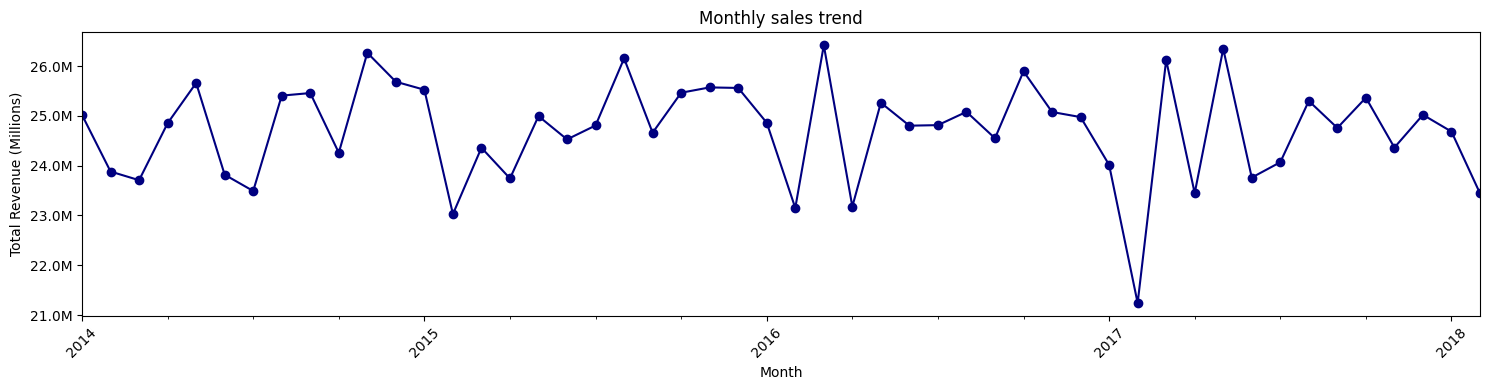

In [169]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker="o", color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos :f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Monthly sales trend")
plt.xlabel("Month")
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [170]:
df['order_month_name'] = df['order_date'].dt.month_name()

df['order_month_num'] = df['order_date'].dt.month

monthly_sales = df.groupby(['order_month_name','order_month_num'])['revenue'].sum().sort_index()

plt.figure(figsize=(15,4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\2007420814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


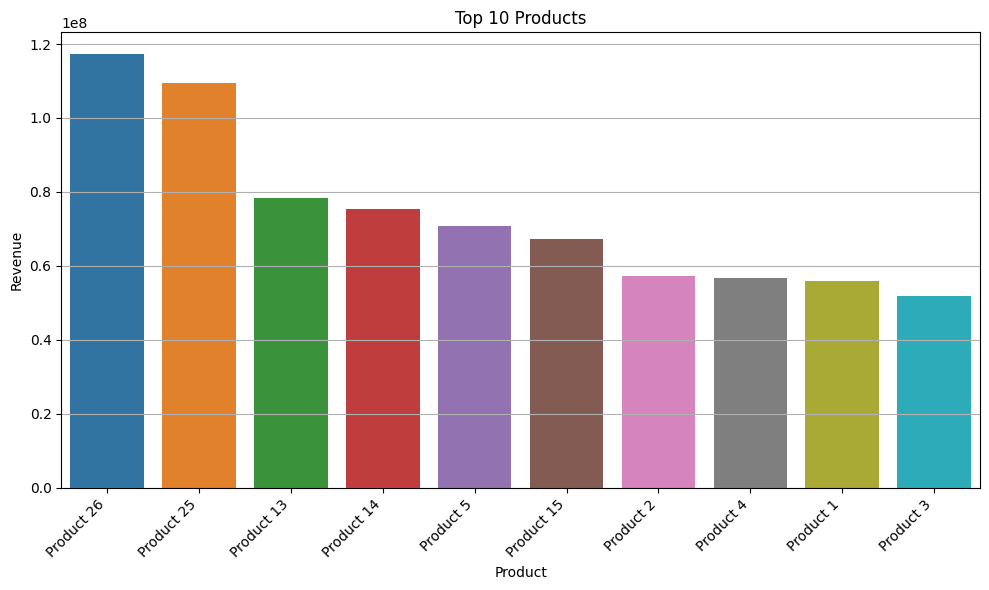

In [176]:
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))

sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')
plt.title('Top 10 Products')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\4006214734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')


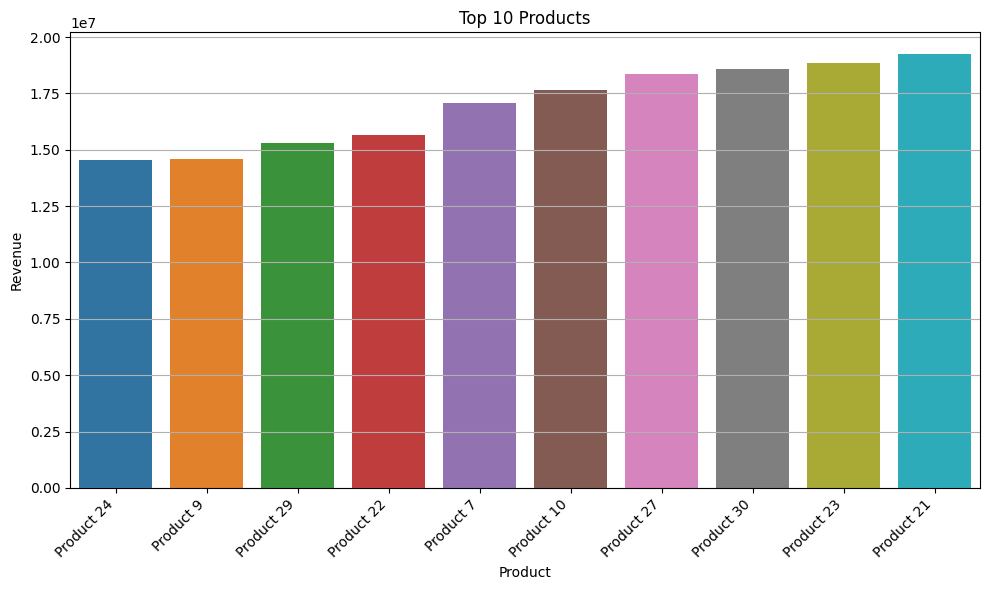

In [177]:
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

plt.figure(figsize=(10,6))

sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')
plt.title('Top 10 Products')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

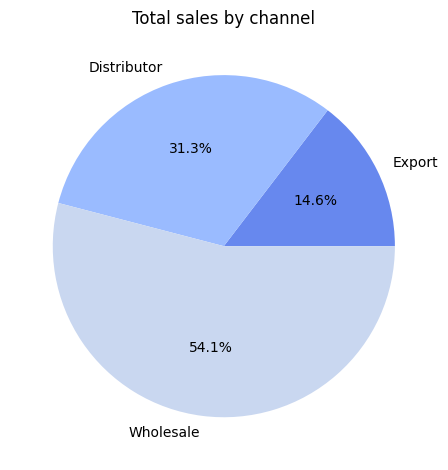

In [180]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.Figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors = sns.color_palette('coolwarm')
)

plt.title('Total sales by channel')

plt.tight_layout()
plt.show()

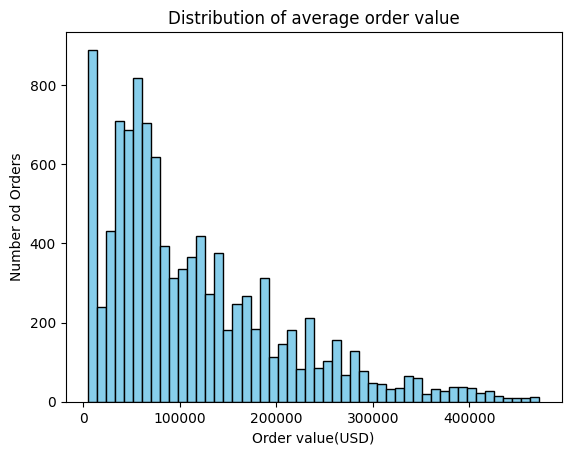

In [185]:
#average order value of distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.Figure(figsize=(12,6))

plt.hist(
    aov.values,
    bins=50,
    color='skyblue',
    edgecolor = 'black'
)

plt.title("Distribution of average order value")
plt.xlabel('Order value(USD)')
plt.ylabel('Number od Orders')

plt.show()

In [186]:
#unit price distribution per product
# top 10 states by revenue and order count
# average profit margin by channel
# top and bottom 10 customers by revenue
# cistomer segmentation revenue vs profit margin
# correlationn heatmap

In [191]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'county', 'state', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_name', 'order_month_num'],
      dtype='object')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\2353949850.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_country, x='county', y='revenue', palette='tab10')


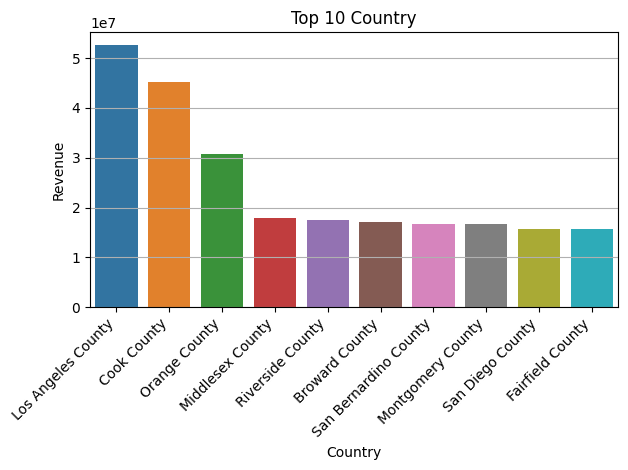

In [204]:
country_revenue = df.groupby('county')['revenue'].sum().reset_index()

top_10_country = country_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=top_10_country, x='county', y='revenue', palette='tab10')
plt.title('Top 10 Country')
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\2696426473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_country, x='county', y='revenue', palette='tab10')


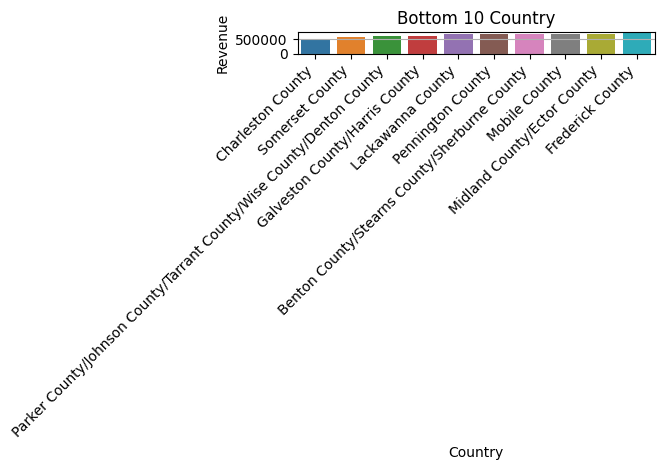

In [209]:
country_revenue = df.groupby('county')['revenue'].sum().reset_index()

bottom_10_country = country_revenue.sort_values(by='revenue', ascending=True).head(10)

# plt.Figure(figsize=(10,4))

sns.barplot(data=bottom_10_country, x='county', y='revenue', palette='tab10')
plt.title('Bottom 10 Country')
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\3513747832.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_country, x='state_name', y='revenue', palette='tab10')


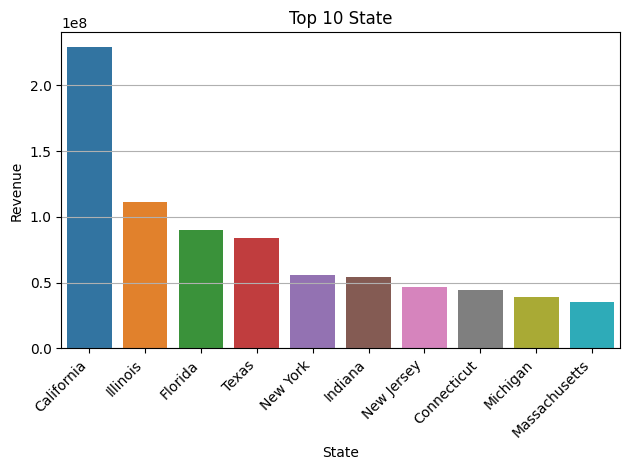

In [200]:
state_revenue = df.groupby('state_name')['revenue'].sum().reset_index()

top_10_country = state_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=top_10_country, x='state_name', y='revenue', palette='tab10')
plt.title('Top 10 State')
plt.xlabel("State")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\2697451506.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_state, x='state_name', y='revenue', palette='tab10')


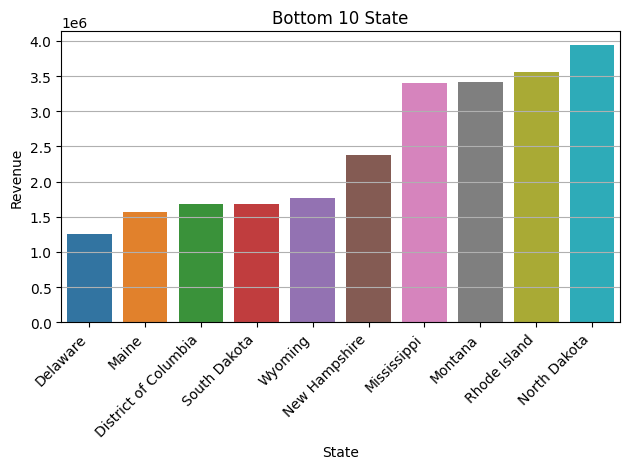

In [203]:
state_revenue = df.groupby('state_name')['revenue'].sum().reset_index()

bottom_10_state = state_revenue.sort_values(by='revenue', ascending=True).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=bottom_10_state, x='state_name', y='revenue', palette='tab10')
plt.title('Bottom 10 State')
plt.xlabel("State")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\3996534224.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_region, x='region', y='revenue', palette='tab10')


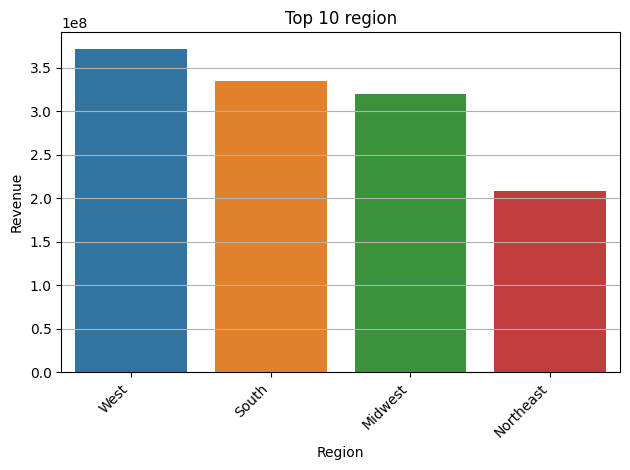

In [216]:
region_revenue = df.groupby('region')['revenue'].sum().reset_index()

top_10_region = region_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=top_10_region, x='region', y='revenue', palette='tab10')
plt.title('Top 10 region')
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

In [212]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'county', 'state', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_name', 'order_month_num'],
      dtype='object')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\1520630327.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_order_state, x='state_name', y='order_number', palette='tab10')


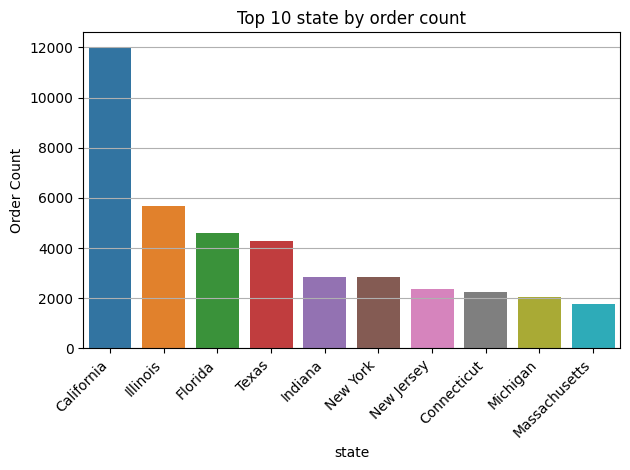

In [219]:
order_state = df.groupby('state_name')['order_number'].count().reset_index()

top_10_order_state = order_state.sort_values(by='order_number', ascending=False).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=top_10_order_state, x='state_name', y='order_number', palette='tab10')
plt.title('Top 10 state by order count')
plt.xlabel("state")
plt.ylabel("Order Count")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\3602625706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_order_state, x='state_name', y='order_number', palette='tab10')


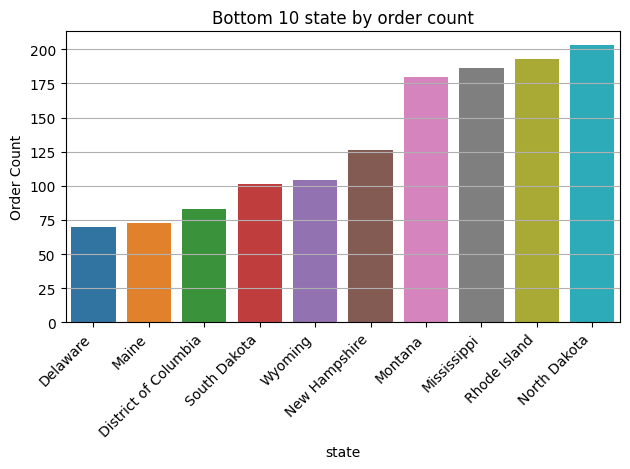

In [220]:
order_state = df.groupby('state_name')['order_number'].count().reset_index()

bottom_10_order_state = order_state.sort_values(by='order_number', ascending=True).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=bottom_10_order_state, x='state_name', y='order_number', palette='tab10')
plt.title('Bottom 10 state by order count')
plt.xlabel("state")
plt.ylabel("Order Count")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

In [222]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'county', 'state', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_name', 'order_month_num'],
      dtype='object')

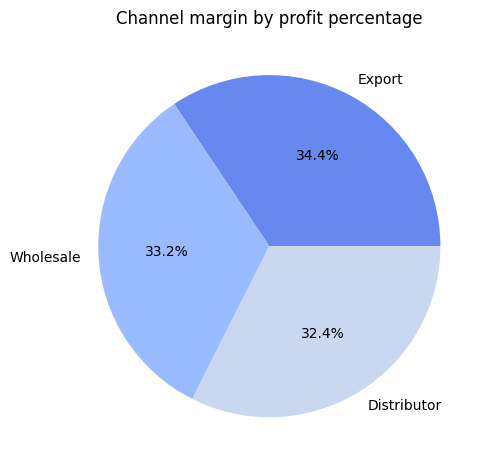

In [223]:
channel_margin = df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=False)

plt.Figure(figsize=(6,4))

plt.pie(
    channel_margin.values,
    labels=channel_margin.index,
    autopct='%1.1f%%',
    colors = sns.color_palette('coolwarm')
)

plt.title('Channel margin by profit percentage')

plt.tight_layout()
plt.show()

In [224]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'county', 'state', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_name', 'order_month_num'],
      dtype='object')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\3887239384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cus_revenue, x='customer_name', y='revenue', palette='tab10')


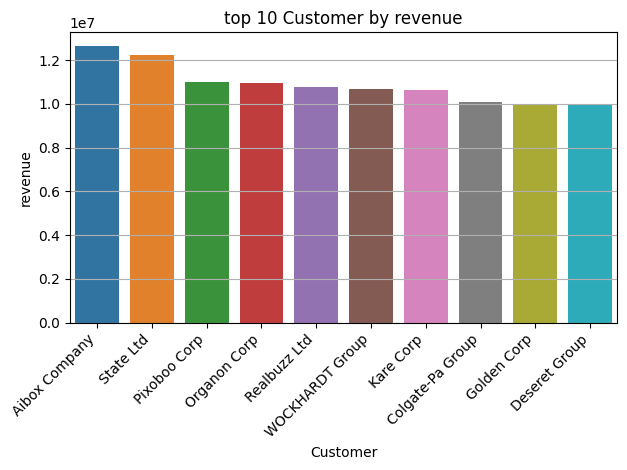

In [226]:
customer_revenue = df.groupby('customer_name')['revenue'].sum().reset_index()

top_10_cus_revenue = customer_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=top_10_cus_revenue, x='customer_name', y='revenue', palette='tab10')
plt.title('top 10 Customer by revenue')
plt.xlabel("Customer")
plt.ylabel("revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10008\803611593.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_cus_revenue, x='customer_name', y='revenue', palette='tab10')


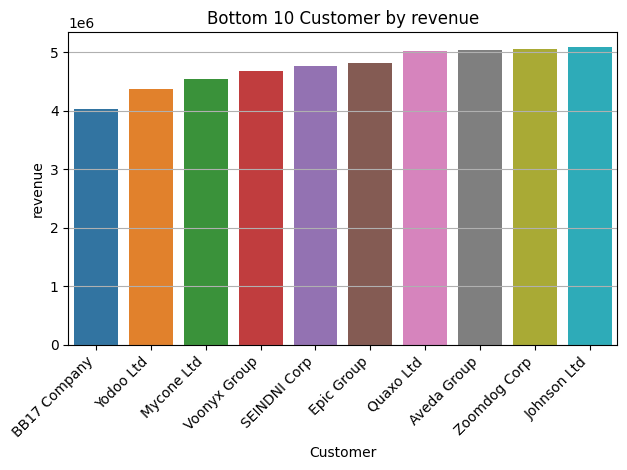

In [227]:
customer_revenue = df.groupby('customer_name')['revenue'].sum().reset_index()

bottom_10_cus_revenue = customer_revenue.sort_values(by='revenue', ascending=True).head(10)

plt.Figure(figsize=(10,4))

sns.barplot(data=bottom_10_cus_revenue, x='customer_name', y='revenue', palette='tab10')
plt.title('Bottom 10 Customer by revenue')
plt.xlabel("Customer")
plt.ylabel("revenue")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True, axis='y')
plt.show()

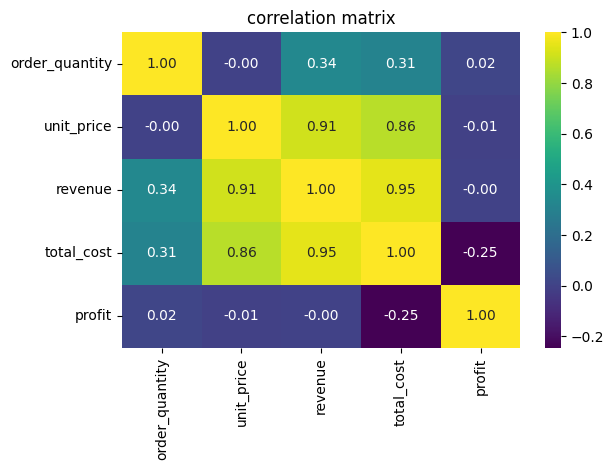

In [234]:
# Correlation heatmap

num_cols = ['order_quantity','unit_price','revenue','total_cost','profit']

corr = df[num_cols].corr()

plt.Figure(figsize=(6,4))

sns.heatmap(corr,annot=True,fmt=".2f",cmap='viridis')

plt.title('correlation matrix')

plt.tight_layout()

plt.show()

In [229]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'county', 'state', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_name', 'order_month_num'],
      dtype='object')

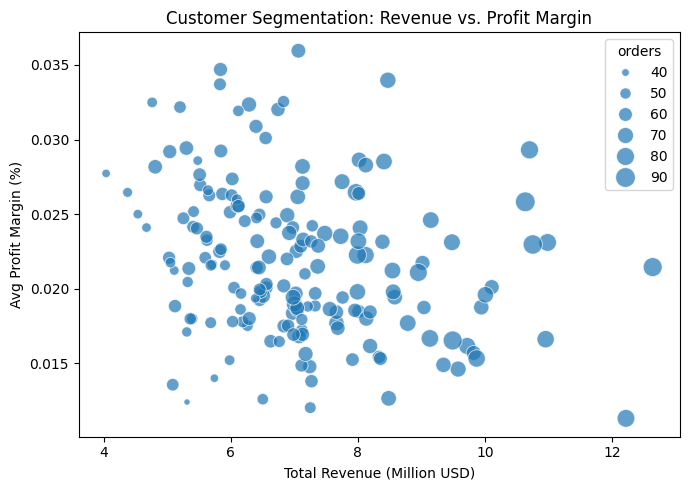

In [233]:
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()